<a href="https://colab.research.google.com/github/sumitraj02/Miniproject1/blob/main/gold_price_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


data collection and processing


In [ ]:
#loading the csv data to pandasdataframe
gold_data=pd.read_csv('/gld_price_data.csv')

In [ ]:
#print first 5 rows in dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#print last five rows of dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# numbers of rows and cols in dataframe
gold_data.shape

(2290, 6)

In [ ]:
#getting some basic info of data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
#getting statistical measure of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


corelation
1.positive corelation
2.negative corelation

In [ ]:
correlation=gold_data.corr(numeric_only=True)

<Axes: >

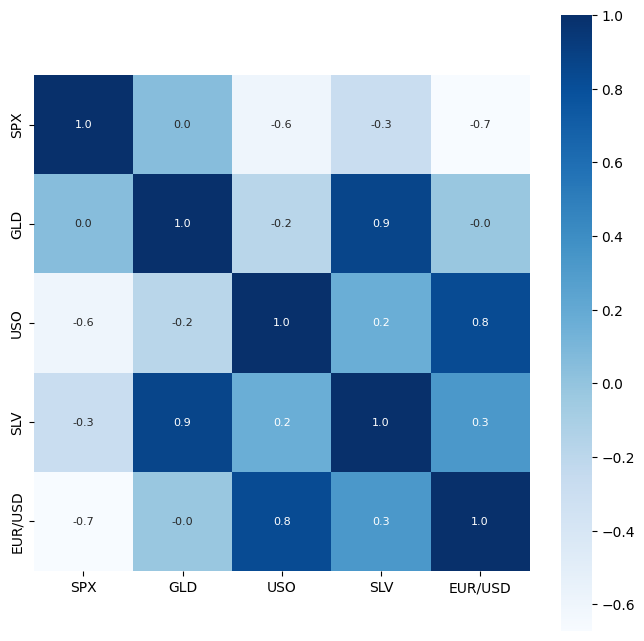

In [ ]:
#creating heatmap to understand corelation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')
#

In [ ]:
#correlation values of gld
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


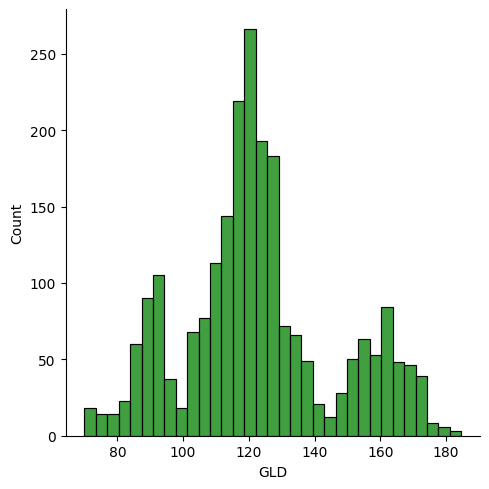

In [ ]:
#checking the distribution  of gold price
sns.displot(gold_data['GLD'],color='green')

splitting the feature and target

In [ ]:
x = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [ ]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
#testing into training data and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

model training using random forest

> Add blockquote



In [ ]:
regressor=RandomForestRegressor(n_estimators=100)

In [ ]:
#training the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

model evaluation


In [ ]:
#predition on based data
test_data_prediction=regressor.predict(x_test)

In [ ]:
print(test_data_prediction)

[168.1866994   81.9569998  116.2074007  127.60380087 120.63270134
 154.66459774 150.66879901 126.19800007 117.65259861 125.9160005
 116.66210035 171.60530076 141.35809864 167.80469833 115.19050024
 117.60390067 139.21230317 169.66530096 159.27040234 160.56869957
 155.08989982 125.12889993 175.85369911 156.51620379 125.15260035
  93.84819975  77.20860019 120.46190025 119.0603993  167.45250016
  88.14290039 125.06250015  91.10840041 117.84479995 121.12099919
 135.96980078 115.70300139 114.84470053 146.23140002 107.14660067
 104.36700236  87.15429798 126.37210083 117.94950012 154.18259938
 119.74070001 108.46889984 108.01109857  93.14340065 127.15279765
  74.78620079 113.73799871 121.16509984 111.25839923 118.82379915
 120.63319935 159.51139978 167.416201   147.36439665  85.75699839
  94.37360061  86.86499886  90.58460002 119.0441008  126.49020038
 127.43179957 170.46369929 122.22969931 117.37179913  98.73030025
 168.66100117 143.05139851 132.10380214 121.15660204 121.07519966
 119.645500

In [ ]:
# R square errored
error_score=metrics.r2_score(y_test,test_data_prediction)
print("R squared error:",error_score)

R squared error: 0.9894559074018691


compare the actual values and predicted values


In [ ]:
y_test=list(y_test)

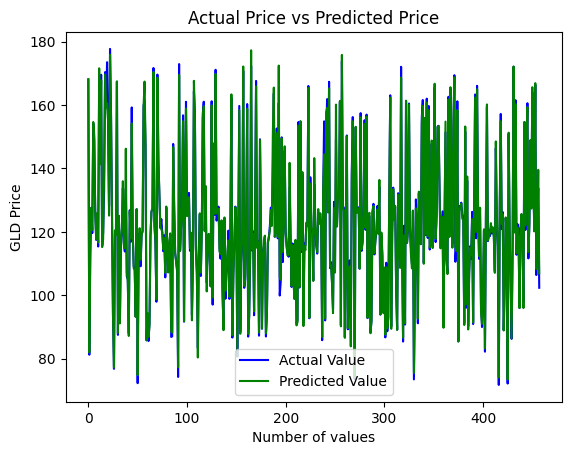

In [ ]:
plt.plot(y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()